In [3]:
import pandas as pd
import seaborn as sns
import rdkit.Chem as Chem
from rdkit.Chem.rdMolDescriptors import CalcFractionCSP3
import matplotlib.pyplot as plt


In [4]:
path_train = 'data/big_dataset_train_props.parquet'
path_pred = 'results/d2_SVC_lolek_150_18-28-52/preds_20230927-095252/predictions.csv'

In [5]:
df0 = pd.read_parquet(path_train)
df0['data'] = 'train'
df1 = pd.read_csv(path_pred)
df1['data'] = 'predicted'
df1['mol'] = df1['smiles'].apply(Chem.MolFromSmiles)
df1['fraction_sp3'] = df1['mol'].apply(CalcFractionCSP3)

df = pd.concat([df0, df1])
df.head()

,smiles,logP,tpsa,fraction_sp3,qed,mol_wt,num_HBA,num_HBD,data,idx,largest_ring,num_rings,no_unwanted_frags,num_rotatable_bonds,bridgehead_atoms,spiro_atoms,mol
1,Cc1nc2c(c(C)c1CC(=O)NCc1ccco1)c(=O)[nH]n2C,1.33034,92.92,0.312500,0.759565,314.137890,5,2,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,O=C(c1csnn1)N1CCCC2(CCN(c3ncccn3)C2)C1,1.46080,75.11,0.533333,0.829743,330.126280,7,0,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CCC(C(=O)NCc1ccco1)n1nc(C)c2c(C)n(-c3ccc(C)cc3...,3.36796,94.95,0.304348,0.517035,419.195740,7,1,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,O=S(=O)(NCc1ccc2c(c1)OCO2)c1c[nH]cn1,0.61690,93.31,0.181818,0.856432,281.047027,5,2,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,O=C(c1cc(O)nc2ccccc12)N1CCN(c2cccc(C(F)(F)F)c2...,3.92160,56.67,0.238095,0.707290,401.135111,4,1,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
fp_type = 'ECFP'
#fp_type = 'klek'

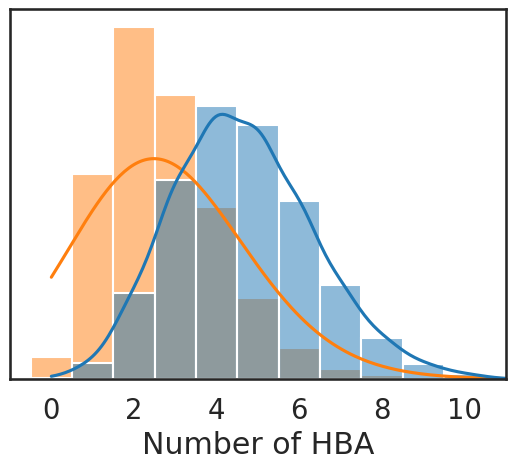

In [7]:
#df['num_HBA'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBA)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.yticks([])
plt.xlim(-1,11)
fig = sns.histplot(df, x='num_HBA', binwidth=2, stat='density', 
             kde=True, kde_kws={'bw_adjust': 5}, hue='data', common_norm=False, discrete=True,
                   legend=False)
fig.set(xlabel='Number of HBA')
plt.savefig(f"plots/train_vs_{fp_type}_HBA.pdf", format='pdf', bbox_inches='tight')

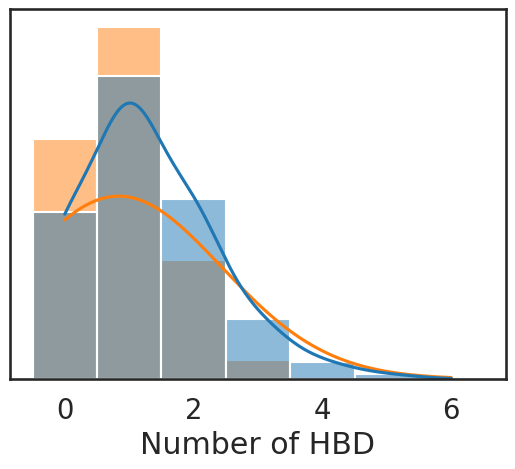

In [14]:
#df['num_HBD'] = df['mol'].apply(Chem.rdMolDescriptors.CalcNumHBD)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.yticks([])
fig = sns.histplot(df, x='num_HBD', binwidth=1, stat='density', 
            kde=True, kde_kws={'bw_adjust': 8}, hue='data', common_norm=False, discrete=True,
                   legend=False)
fig.set(xlabel='Number of HBD')
plt.savefig(f"plots/train_vs_{fp_type}_HBD.pdf", format='pdf', bbox_inches='tight')

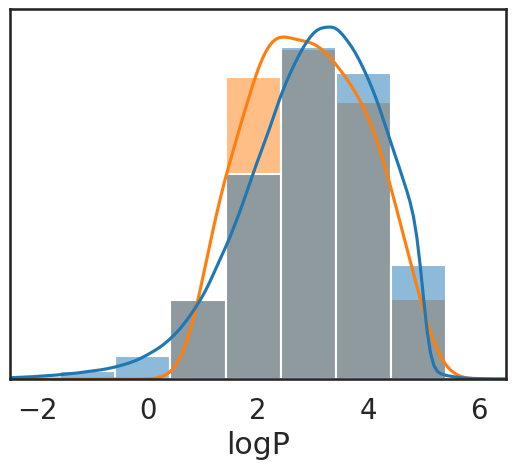

In [15]:
#df['logP'] = df['mol'].apply(Chem.Crippen.MolLogP)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.xlim(-2.5, 6.5)
plt.yticks([])
fig = sns.histplot(df, x='logP', binwidth=1, stat='density',
            kde=True, kde_kws={'bw_adjust': 1.5}, hue='data', common_norm=False,
                   legend=False)
fig.set(xlabel='logP')
plt.savefig(f"plots/train_vs_{fp_type}_logP.pdf", format='pdf', bbox_inches='tight')

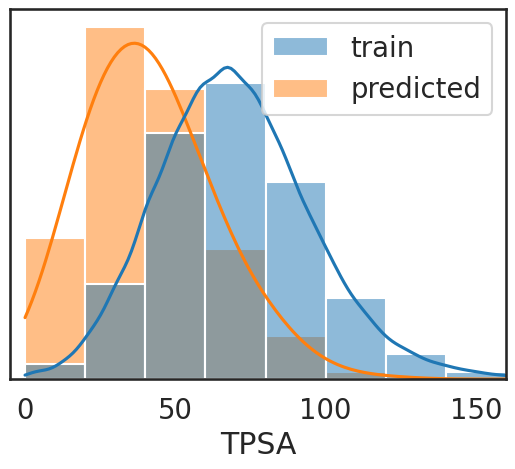

In [8]:
#df['tpsa'] = df['mol'].apply(Chem.rdMolDescriptors.CalcTPSA)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.yticks([])
plt.xlim(-5,160)
fig = sns.histplot(df, x='tpsa', binwidth=20, stat='density',
            kde=True, kde_kws={'bw_adjust': 2}, hue='data', common_norm=False)
fig.set(xlabel='TPSA')
fig.legend_.set_title(None)
plt.savefig(f"plots/train_vs_{fp_type}_TPSA.pdf", format='pdf', bbox_inches='tight')

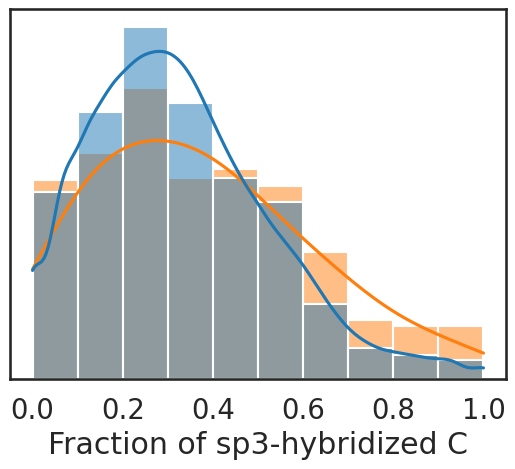

In [17]:
#df['fraction_sp3'] = df['mol'].apply(CalcFractionCSP3)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.xlim(-0.05, 1.05)
plt.yticks([])
fig = sns.histplot(df, x='fraction_sp3', binwidth=0.1, stat='density',
            kde=True, kde_kws={'bw_adjust': 2}, hue='data', common_norm=False,
                   legend=False)
fig.set(xlabel='Fraction of sp3-hybridized C')
plt.savefig(f"plots/train_vs_{fp_type}_sp3.pdf", format='pdf', bbox_inches='tight')

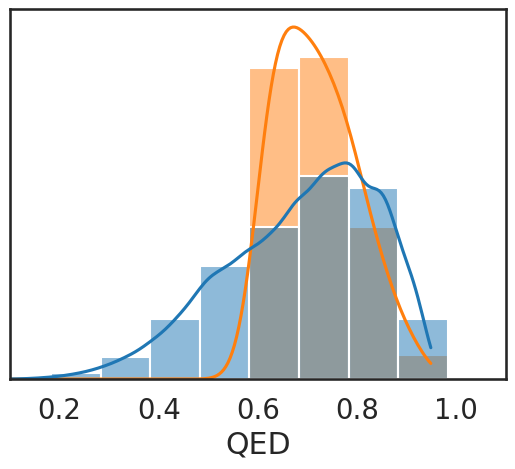

In [21]:
#df['qed'] = df['mol'].apply(QED.qed)
sns.set_context("talk", font_scale=1.2)
sns.set_style("white")
plt.yticks([])
fig = sns.histplot(df, x='qed', binwidth=0.1, stat='density',
            kde=True, kde_kws={'bw_adjust': 2.0}, hue='data', common_norm=False,
                   legend=False)
plt.xlim(0.1, 1.1)
fig.set(xlabel='QED')
plt.savefig(f"plots/train_vs_{fp_type}_QED.pdf", format='pdf', bbox_inches='tight')

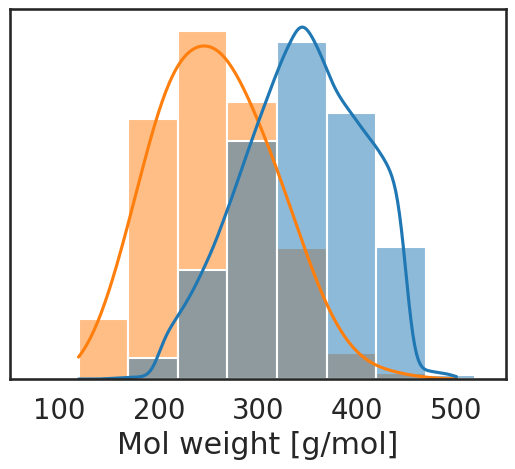

In [22]:
#df['mol_wt'] = df['mol'].apply(Chem.rdMolDescriptors.CalcExactMolWt)
sns.set_context("talk", font_scale=1.2)
plt.xlim(50, 550)
sns.set_style("white")
plt.yticks([])
fig = sns.histplot(df, x='mol_wt', binwidth=50, stat='density',
            kde=True, kde_kws={'bw_adjust': 2}, hue='data', common_norm=False,
                   legend=False)
fig.set(xlabel='Mol weight [g/mol]')
plt.savefig(f"plots/train_vs_{fp_type}_mol_wt.pdf", format='pdf', bbox_inches='tight')

In [1]:
import pandas as pd
import seaborn as sns
import rdkit.Chem as Chem
import rdkit.Chem.Draw as Draw
df = pd.read_csv('docking/outputs/concat_20231004-090641.csv')
df1 = pd.read_csv('docking/outputs_valid_1k_seed42/concat_20231004-090641.csv')

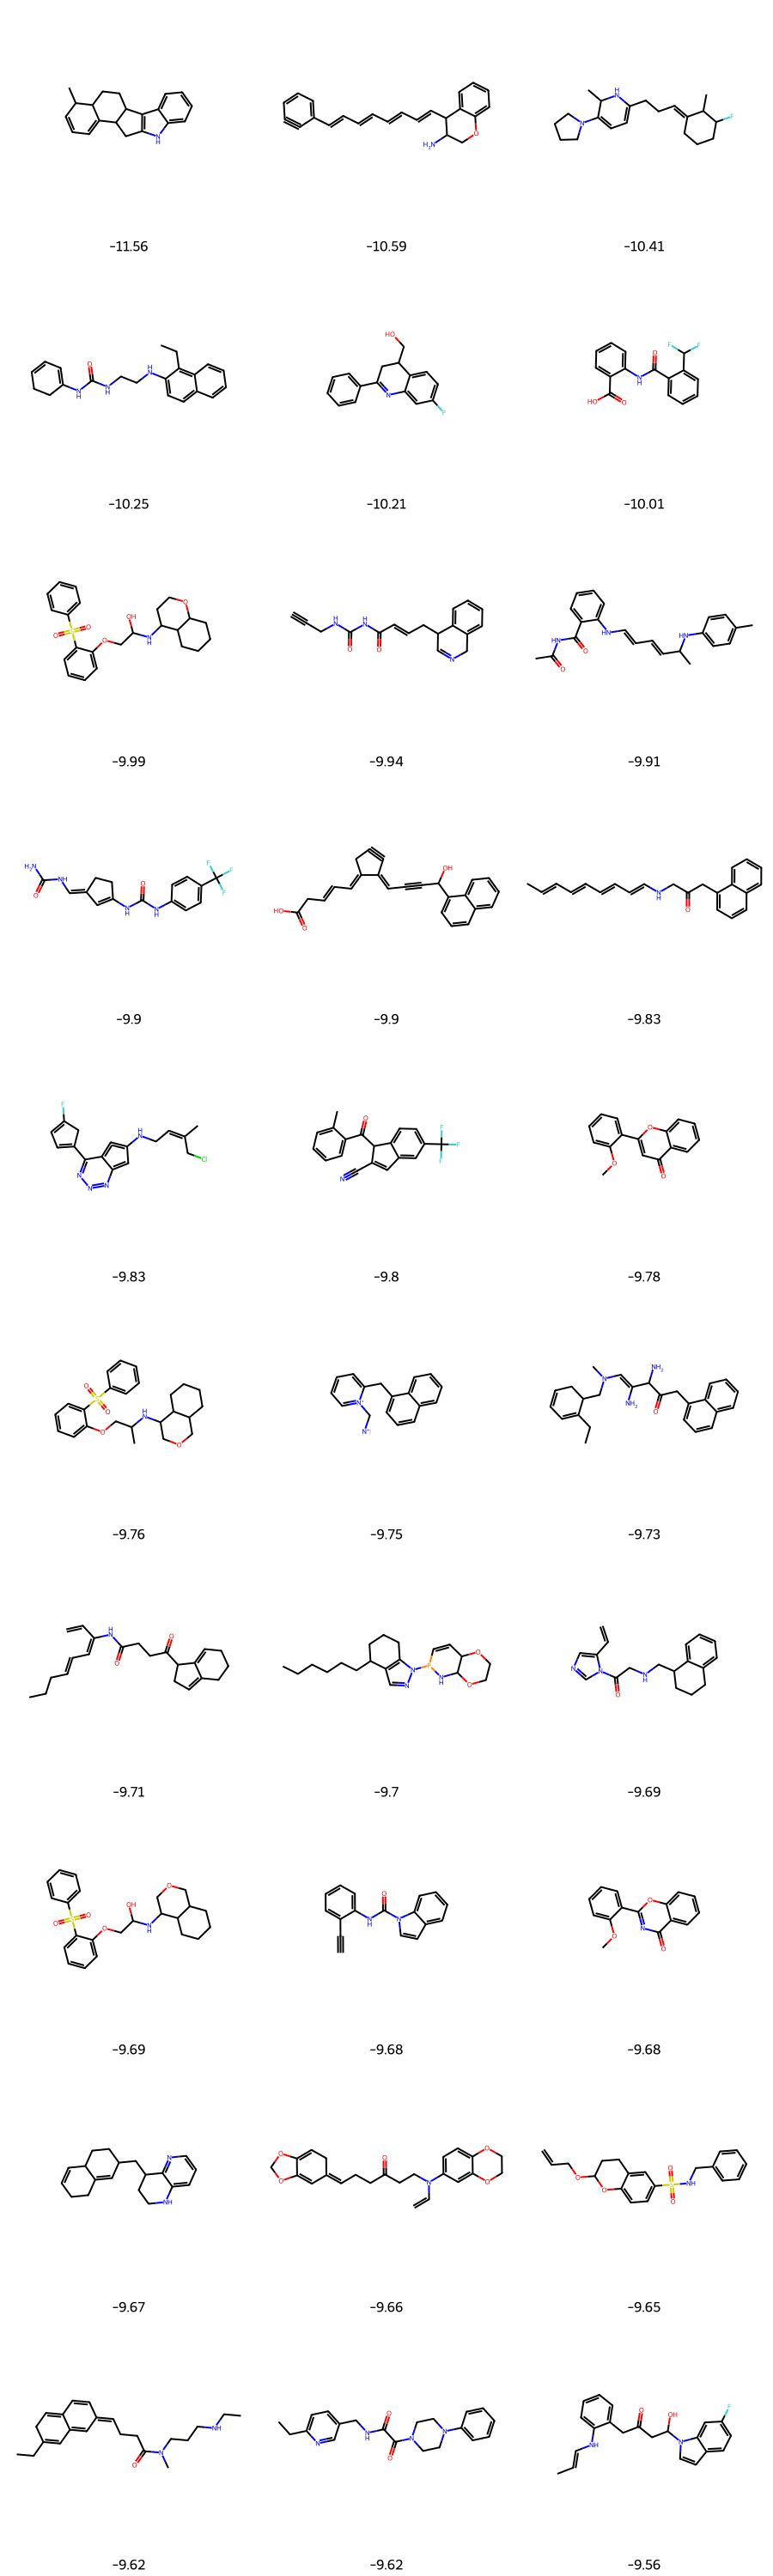

In [21]:
df.head()
df = df.sort_values(by='score')
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in df['smiles'][:30]], molsPerRow=3, subImgSize=(300, 300), legends=df['score'][:30].round(2).astype(str).tolist())

In [29]:
smiles = df.iloc[29]['smiles']


'O=C(CC1=CC=CC=C1NC=CC)CC(N2C=CC3=CC=C(F)C=C32)O'

[Text(0.5, 0, 'Docking score')]

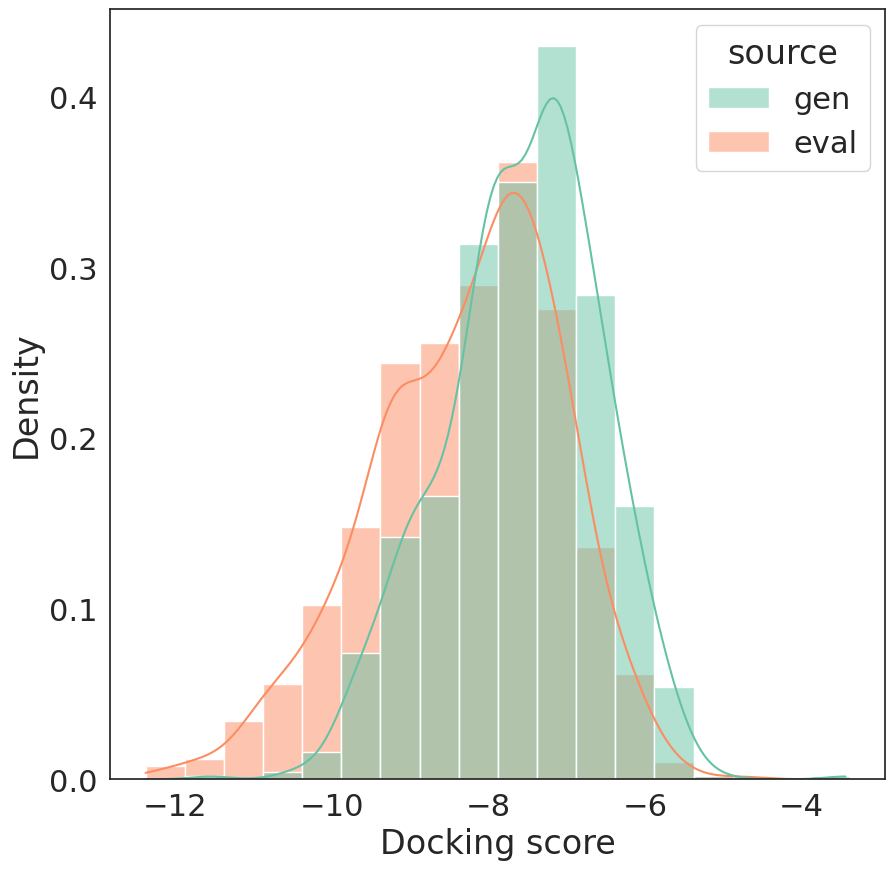

In [7]:
df = pd.read_csv('docking/d2_ligands_docked.csv')
df['source'] = ['gen'] * len(df)
df1 = pd.read_csv('docking/eval_docked_to_d2.csv')
df1['source'] = ['eval'] * len(df1)
concat = pd.concat([df, df1])

sns.set(font_scale=2, style='white', rc={'figure.figsize':(10, 10)})
fig = sns.histplot(concat, x='score', binwidth=0.5, stat='density', 
                   common_norm=False, kde=True, palette='Set2', hue='source')
fig.set(xlabel='Docking score')

In [159]:
from src.utils.modelinit import initialize_model
from src.utils.vectorizer import SELFIESVectorizer
import torch
import rdkit.Chem as Chem
import rdkit.Chem.AllChem
import selfies as sf

model = initialize_model('models/GRUv3_ECFP_tola/hyperparameters.ini', dropout=False, device='cuda')
model.load_state_dict(torch.load('models/GRUv3_ECFP_tola/epoch_150.pt'))

<All keys matched successfully>

In [230]:
drug = 'CCN1CCCC1CNC(=O)C1=C(OC)C=CC(=C1)S(N)(=O)=O'
mol = Chem.MolFromSmiles(drug)
ECFP = Chem.AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
ECFP = torch.tensor(ECFP).float().unsqueeze(0).to('cuda')
encoded_mu = model.encoder(ECFP)[0]
encoded_mus = encoded_mu.repeat(20, 1)
randomised_mus = encoded_mus + torch.randn_like(encoded_mus) * 0.3

pdist = torch.nn.PairwiseDistance(p=2)
distances = pdist(encoded_mus, randomised_mus)
distances

tensor([1.6978, 1.4142, 1.9011, 1.3227, 1.5957, 1.8669, 1.6742, 1.5819, 1.6226,
        1.6499, 1.6869, 1.5578, 2.1953, 1.8945, 1.3591, 1.2983, 1.5258, 1.5840,
        1.5768, 1.8511], device='cuda:0', grad_fn=<NormBackward1>)

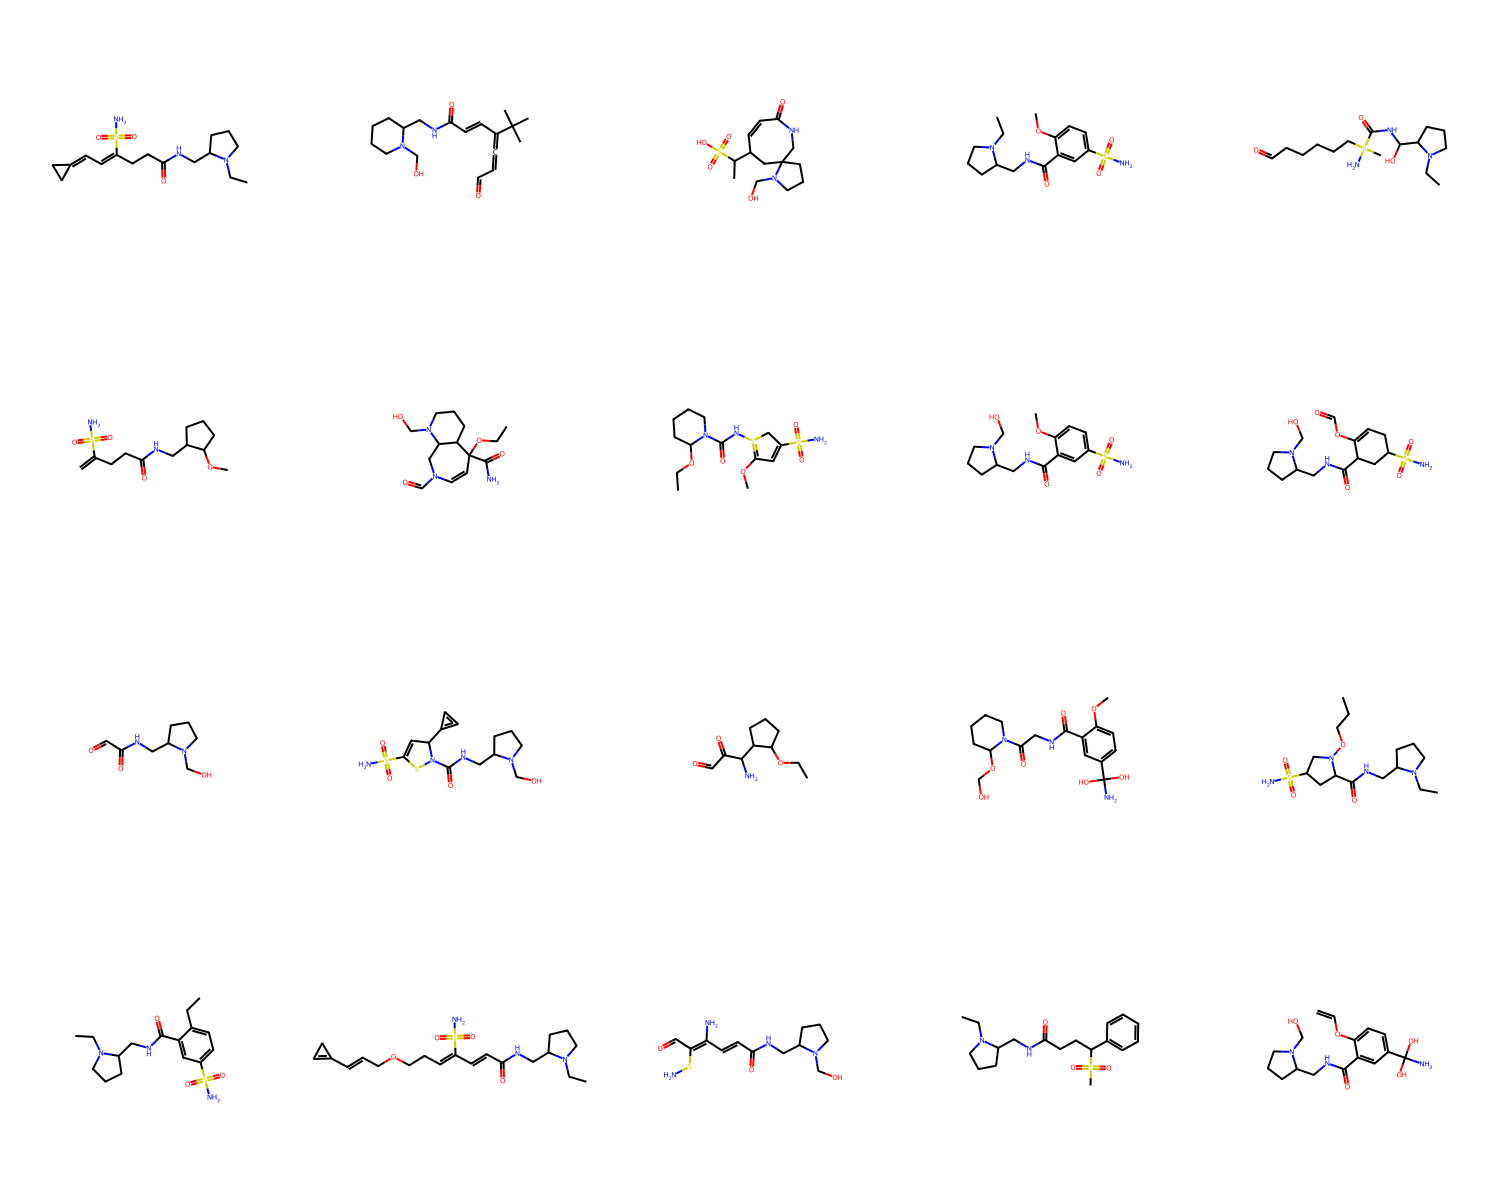

In [231]:
vectorizer = SELFIESVectorizer(pad_to_len=128)
decoded = model(randomised_mus, _, omit_encoder=True)[0].cpu().detach().numpy()
smiles_list = []
for x in decoded:
    selfies = vectorizer.devectorize(x, remove_special=True)
    smiles = sf.decoder(selfies)
    smiles_list.append(smiles)
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(300, 300))

In [1]:
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
drawer = Draw.rdMolDraw2D.MolDraw2DSVG(400,400)

for i, mol in enumerate(mol_list):
    rdDepictor.Compute2DCoords(mol)
    Draw.MolToFile(mol, f'plots/latent_space/{i}.png', size=(400, 400))

NameError: name 'mol_list' is not defined

In [ ]:
import pandas as pd